### load package

In [1]:
library(caret)
library(boot)
library(MASS)
library(MLmetrics)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'boot'


The following object is masked from 'package:lattice':

    melanoma



Attaching package: 'MLmetrics'


The following objects are masked from 'package:caret':

    MAE, RMSE


The following object is masked from 'package:base':

    Recall




# Q1

### Load data

In [2]:
car93 <- read.csv(file = '/Users/gawain/Desktop/3.UBC/Block4/Data-572-Supervised learning/Assignment/Assignment2/car93.csv')
head(car93)

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,Acura,Integra,Small,15.9,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11,2705
2,Acura,Legend,Midsize,33.9,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15,3560
3,Audi,90,Compact,29.1,20,26,2.8,172,5500,2280,16.9,180,102,67,37,28.0,14,3375
4,Audi,100,Midsize,37.7,19,26,2.8,172,5500,2535,21.1,193,106,70,37,31.0,17,3405
5,BMW,535i,Midsize,30.0,22,30,3.5,208,5700,2545,21.1,186,109,69,39,27.0,13,3640
6,Buick,Century,Midsize,15.7,22,31,2.2,110,5200,2565,16.4,189,105,69,41,28.0,16,2880


In [3]:
car93[c(1, 18),]

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,Acura,Integra,Small,15.9,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11,2705
18,Chrysler,LeBaron,Compact,15.8,23,28,3.0,141,5000,2090,16.0,183,104,68,41,30.5,14,3085


## Part 1

Perform a principal components analysis on the numeric variables within the car93 data set. 

Provide a summary of the fitted model and a biplot. 

Ensure you scale the data.

In [4]:
colSums(is.na(car93))

Manufacturer              Model               Type              Price 
                 0                  0                  0                  0 
          MPG.city        MPG.highway         EngineSize         Horsepower 
                 0                  0                  0                  0 
               RPM       Rev.per.mile Fuel.tank.capacity             Length 
                 0                  0                  0                  0 
         Wheelbase              Width        Turn.circle     Rear.seat.room 
                 0                  0                  0                  0 
      Luggage.room             Weight 
                 0                  0

In [5]:
summary((car93))

 Manufacturer          Model               Type               Price      
 Length:82          Length:82          Length:82          Min.   : 7.40  
 Class :character   Class :character   Class :character   1st Qu.:11.65  
 Mode  :character   Mode  :character   Mode  :character   Median :16.10  
                                                          Mean   :19.17  
                                                          3rd Qu.:23.60  
                                                          Max.   :61.90  
    MPG.city      MPG.highway      EngineSize      Horsepower         RPM      
 Min.   :16.00   Min.   :22.00   Min.   :1.000   Min.   : 55.0   Min.   :3800  
 1st Qu.:19.00   1st Qu.:26.00   1st Qu.:1.800   1st Qu.:100.0   1st Qu.:5000  
 Median :22.00   Median :29.00   Median :2.300   Median :134.5   Median :5400  
 Mean   :23.09   Mean   :29.98   Mean   :2.589   Mean   :140.0   Mean   :5328  
 3rd Qu.:25.00   3rd Qu.:32.75   3rd Qu.:3.200   3rd Qu.:170.0   3rd Qu.:5800  
 M

- The car93 is cleaned and has no null value
- the variables measured are on vastly different scales. We should be careful to scale any PCA performed

In [6]:
car93.numeric <- car93[sapply(car93, is.numeric)]
car93.pca <- prcomp(car93.numeric, scale.=TRUE)
summary(car93.pca)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5    PC6     PC7
Standard deviation     3.1704 1.2840 0.97225 0.76321 0.6504 0.5732 0.53562
Proportion of Variance 0.6701 0.1099 0.06302 0.03883 0.0282 0.0219 0.01913
Cumulative Proportion  0.6701 0.7800 0.84304 0.88187 0.9101 0.9320 0.95110
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.44946 0.41551 0.34330 0.26369 0.26018 0.20809 0.19842
Proportion of Variance 0.01347 0.01151 0.00786 0.00464 0.00451 0.00289 0.00262
Cumulative Proportion  0.96457 0.97608 0.98393 0.98857 0.99308 0.99597 0.99859
                          PC15
Standard deviation     0.14522
Proportion of Variance 0.00141
Cumulative Proportion  1.00000

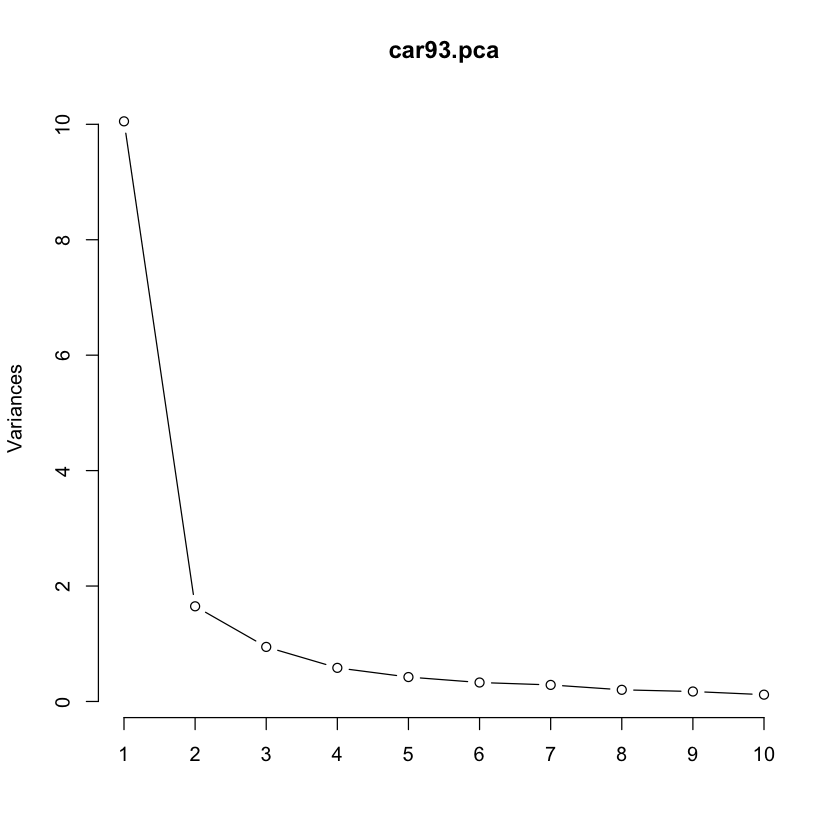

In [7]:
plot(car93.pca, type='l')


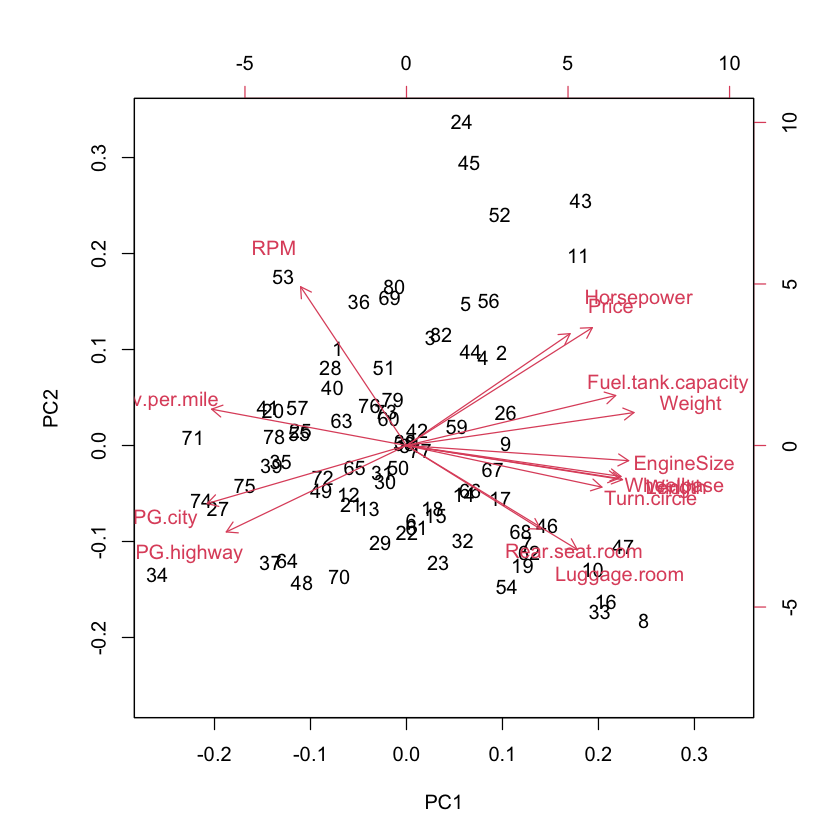

In [8]:
biplot(car93.pca)

## Part 2

Interpret the loadings of the first principal component.

In [9]:
# based on the plot in the part 1
# I will take first 2 components to look in depth for part 2 and 3
car93.pca$rotation[,1:2]

,PC1,PC2
Price,0.2204708,0.37225168
MPG.city,-0.2686351,-0.19307271
MPG.highway,-0.2428963,-0.28759336
EngineSize,0.2993827,-0.05044005
Horsepower,0.2504771,0.39222489
RPM,-0.1427112,0.52833268
Rev.per.mile,-0.2626478,0.12094301
Fuel.tank.capacity,0.2819184,0.16643949
Length,0.2911181,-0.11364032
Wheelbase,0.2890445,-0.10287701


In [10]:
# do some rounding
round(car93.pca$rotation[,1:2], 2)

,PC1,PC2
Price,0.22,0.37
MPG.city,-0.27,-0.19
MPG.highway,-0.24,-0.29
EngineSize,0.30,-0.05
Horsepower,0.25,0.39
RPM,-0.14,0.53
Rev.per.mile,-0.26,0.12
Fuel.tank.capacity,0.28,0.17
Length,0.29,-0.11
Wheelbase,0.29,-0.10


In [11]:
# Let’s make it even more readable. 
# Since we have lots of values here, it is often easier to view just the variables that surpass some threshold of absolute magnitude. 
# the threshold I will set as 0.2 (like the one in the lab4)

loadi <- round(car93.pca$rotation[,1:2], 2)
loadi[abs(loadi)<0.2] <- NA
loadi

,PC1,PC2
Price,0.22,0.37
MPG.city,-0.27,NA
MPG.highway,-0.24,-0.29
EngineSize,0.30,NA
Horsepower,0.25,0.39
RPM,NA,0.53
Rev.per.mile,-0.26,NA
Fuel.tank.capacity,0.28,NA
Length,0.29,NA
Wheelbase,0.29,NA


- Let’s start with the first component. This component has relatively high loading of nearly all the variables. 
- Interestingly, most of the loadings (including those below the threshold) are positive. 
- So we don't change the direction of the PC1

In [12]:
# Now we can check the correlation in different columns which can affect the 'Car quality', we will expect any car item that:
# - scores high would be good car
# - scores low would be not-good car
head(car93[order(-car93.pca$x[,1], decreasing=TRUE),1])

[1] "Geo"     "Subaru"  "Suzuki"  "Ford"    "Toyota"  "Hyundai"

In [13]:
tail(car93[order(-car93.pca$x[,1], decreasing=TRUE),1])

[1] "Infiniti"  "Cadillac"  "Ford"      "Chevrolet" "Lincoln"   "Buick"

## Part C
Interpret the loadings of the second principal component.

In [14]:
head(car93[order(-car93.pca$x[,2], decreasing=TRUE),1])

[1] "Buick"     "Ford"      "Chevrolet" "Mercury"   "Mazda"     "Saturn"

In [15]:
tail(car93[order(-car93.pca$x[,2], decreasing=TRUE),1])

[1] "Mercury"       "Cadillac"      "Mercedes-Benz" "Infiniti"     
[5] "Lexus"         "Dodge"

## Part D

How many principal components should be kept...

      i. according to the Kaiser criterion?
      ii. if we wish to retain at least 90% of the variance in the data?
      iii. according to the scree plot?

In [16]:
summary(car93.pca)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5    PC6     PC7
Standard deviation     3.1704 1.2840 0.97225 0.76321 0.6504 0.5732 0.53562
Proportion of Variance 0.6701 0.1099 0.06302 0.03883 0.0282 0.0219 0.01913
Cumulative Proportion  0.6701 0.7800 0.84304 0.88187 0.9101 0.9320 0.95110
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.44946 0.41551 0.34330 0.26369 0.26018 0.20809 0.19842
Proportion of Variance 0.01347 0.01151 0.00786 0.00464 0.00451 0.00289 0.00262
Cumulative Proportion  0.96457 0.97608 0.98393 0.98857 0.99308 0.99597 0.99859
                          PC15
Standard deviation     0.14522
Proportion of Variance 0.00141
Cumulative Proportion  1.00000

1. According to the Kaiser criterion(>= 1.0), we should only keep 2 components.

2. As PC5 is the first one reach over 0.9 in the Cumulative Proportion, thus we should keep 5 components.

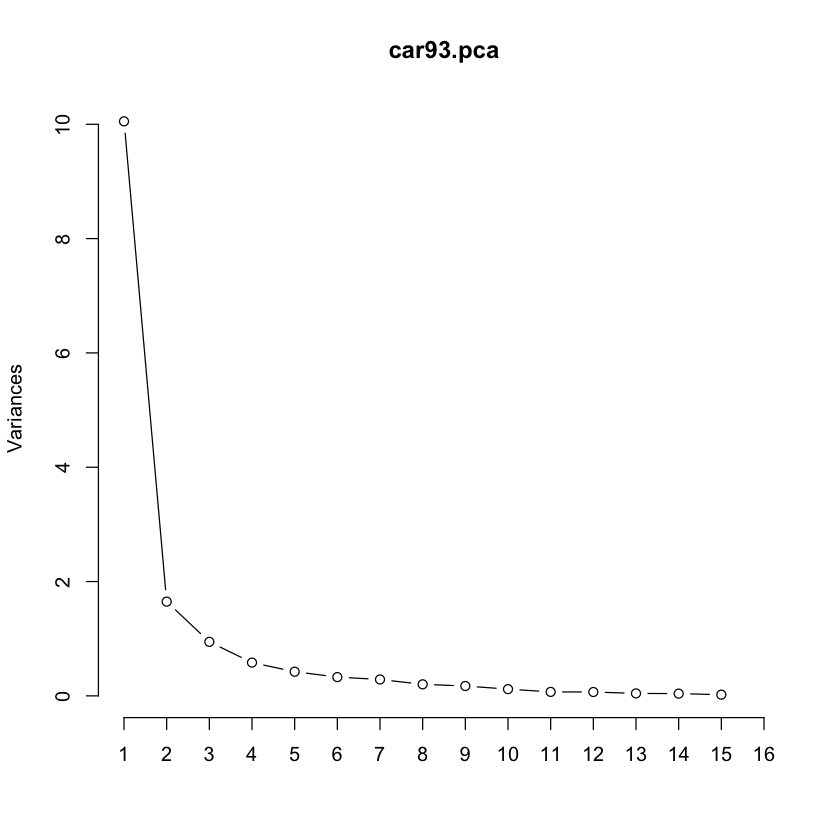

In [17]:
plot(car93.pca, type='l', npcs = 16)

If we look at the screen plot, Best argument might be for 3 or 4 components, but it'll be leaving a lot of variance on the table.

## Part E

Keep the components suggested by the Kaiser criterion and..

In [18]:
scr <- car93.pca$x[,1:2]
head(scr)

PC1,PC2
-2.0524746,1.1810204
2.8553097,1.1252703
0.7098199,1.3061906
2.3029318,1.0732966
1.7814785,1.7221741
0.1462982,-0.9022327


### E.1
perform logistic regression (with a manual loop for leave one out cross-validation) with our response being “Small” or “Not Small” for the “Type” of car and the predictors being the components retained. 

What is the cross-validated logloss of this model?

In [19]:
car93 <- read.csv(file = '/Users/gawain/Desktop/3.UBC/Block4/Data-572-Supervised learning/Assignment/Assignment2/car93.csv')
# set Small as 1, else as 0
car93$Type <- ifelse(car93$Type == "Small", 1, 0)

head(car93)
Type <- car93$Type
Type

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,Acura,Integra,1,15.9,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11,2705
2,Acura,Legend,0,33.9,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15,3560
3,Audi,90,0,29.1,20,26,2.8,172,5500,2280,16.9,180,102,67,37,28.0,14,3375
4,Audi,100,0,37.7,19,26,2.8,172,5500,2535,21.1,193,106,70,37,31.0,17,3405
5,BMW,535i,0,30.0,22,30,3.5,208,5700,2545,21.1,186,109,69,39,27.0,13,3640
6,Buick,Century,0,15.7,22,31,2.2,110,5200,2565,16.4,189,105,69,41,28.0,16,2880


[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0
[39] 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0
[77] 0 1 0 0 0 0

In [20]:
Type <- car93$Type

df <- cbind(Type, scr) # combine Type column and PCA(1 to 3)
df <- as.data.frame(df)
head(df)

,Type,PC1,PC2
,<dbl>,<dbl>,<dbl>
1,1,-2.0524746,1.1810204
2,0,2.8553097,1.1252703
3,0,0.7098199,1.3061906
4,0,2.3029318,1.0732966
5,0,1.7814785,1.7221741
6,0,0.1462982,-0.9022327


In [21]:
n <- nrow(car93)
sum <- 0
result <- rep(0, n)

for(i in 1:n){
      train <- df[-i,]
      test <- df[i,]
      model <- glm(factor(Type) ~ ., data = train, family = 'binomial')
      y_pred <- predict(model, test ,type = 'response')
      # print(y_pred)
      
      result[i] <- ifelse(y_pred > 0.5, 1, 0) 
      sum <- sum + test$Type*log(y_pred) + (1-test$Type)*log(1-y_pred)
}


In [22]:
table1 <- table(df$Type, result)
logloss <- -sum/n
cat('Classification table:\n')
table1
cat('Log loss is: ', logloss)
class_acc <- sum(diag(table1))/n
cat('\nClassification Accuracy:', class_acc)

Classification table:


   result
     0  1
  0 58  3
  1  4 17

Log loss is:  0.2457001
Classification Accuracy: 0.9146341

### E.2
perform LDA (with built-in leave-one-out cross-validation) with our response being “Small” or “Not Small” for the “Type” of car and the predictors being the components retained. 

What is the cross-validated logloss of this model?

In [23]:
car93.lda <- lda(Type ~ PC1 + PC2, data = df, CV=TRUE)
table(df$Type, car93.lda$class)
logloss2 <- LogLoss(car93.lda$posterior[,2], df$Type)
cat('Log loss for type with all Small and Not Small(0, 1):', logloss2)

   
     0  1
  0 58  3
  1  4 17

Log loss for type with all Small and Not Small(0, 1): 0.2216978

### E.3

perform LDA (with built-in leave-one-out cross-validation) using all categories from the original “Type” variable as the response. 

What is the logloss of this model?

In [24]:
car93 <- read.csv(file = '/Users/gawain/Desktop/3.UBC/Block4/Data-572-Supervised learning/Assignment/Assignment2/car93.csv')
unique(car93$Type)

[1] "Small"   "Midsize" "Compact" "Large"   "Sporty"

In [25]:
Type_numeric <-  as.numeric(factor(car93$Type))
# Type_numeric
df3 <- cbind(Type_numeric, scr) # combine Type column and PCA(1 to 3)
df3 <- as.data.frame(df3)
head(df3)

,Type_numeric,PC1,PC2
,<dbl>,<dbl>,<dbl>
1,4,-2.0524746,1.1810204
2,3,2.8553097,1.1252703
3,1,0.7098199,1.3061906
4,3,2.3029318,1.0732966
5,3,1.7814785,1.7221741
6,3,0.1462982,-0.9022327


In [26]:
car93.lda3 <- lda(Type_numeric ~ PC1 + PC2, data = df3, CV=TRUE)
table(df$Type, car93.lda3$class)
logloss3 <- LogLoss(car93.lda3$posterior[,2], df3$Type)
cat('Log loss for type with all unique category:', logloss3)

   
     1  2  3  4  5
  0 20 11 22  4  4
  1  2  0  0 16  3

Log loss for type with all unique category: 31.68824

# Q2

Fit a neural network (using nnet) on the “fish toxicity” data set (also on Canvas) with the 7th variable as the response, with one hidden layer and 5 hidden layer variables to predict toxicity using all other variables. 

Note: you can see the original source for this here: https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity. 

In order to provide a proper fit, you will need to normalize the variables. 

If you have an R object called fishdata, then we can use the following command to quickly normalize the way briefly described in class:

### load package

In [27]:
# install.packages('NeuralNetTools')
# install.packages('neuralnet')

In [28]:
library(neuralnet)
library(NeuralNetTools)
library(nnet)
library(gclus)

Loading required package: cluster



### load data

1) CIC0
2) SM1_Dz(Z)
3) GATS1i
4) NdsCH
5) NdssC
6) MLOGP
7) quantitative response, LC50 [-LOG(mol/L)]

In [50]:
fish_path = '/Users/gawain/Desktop/3.UBC/Block4/Data-572-Supervised learning/Assignment/Assignment2/fish_toxicity.csv'
fish <- read.csv(fish_path, , header = FALSE,sep = ";")
colnames(fish) <- c("CIC0", "SM1_Dz(Z)", "GATS1i", "NdsCH", "NdssC", "MLOGP", "LC50")
sfish <- apply(fish[, 1:6], 2, function(v) (v-min(v))/(max(v)-min(v)))
sfish <- as.data.frame(sfish)
sfish$LC50 <- fish$LC50 
# sfish$LC50 <- as.factor(sfish$LC50)
head(sfish)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4930595,0.3818517,0.5071315,0.00,0.1666667,0.4614321,3.770
2,0.2894086,0.2671580,0.1850238,0.00,0.0000000,0.4502607,3.115
3,0.2772390,0.2938738,0.1723455,0.00,0.0000000,0.4502607,3.531
4,0.4487545,0.1524643,0.4263074,0.25,0.0000000,0.4990956,3.510
5,0.2713444,0.3809304,0.1838352,0.00,0.0000000,0.5075008,5.390
6,0.4858338,0.1524643,0.7056260,0.00,0.0000000,0.3819555,1.819


### Part A

In [49]:
# help(nnet)

In [51]:
# size: number of units in the hidden layer. Can be zero if there are skip-layer units.
set.seed(4521)
nnfish <- nnet(x=sfish[, 1:6], y=sfish[, 7], size=5, maxit=1000)

# weights:  41
initial  value 13937.223393 
final  value 10448.772959 
converged


In [52]:
# y_pred <- predict(nnfish, newdata=sfish[,1:6])[, 1]
MSE <- mean((nnfish$fitted.values - sfish[, 7])^2)
MSE

[1] 11.50746

### Part B

In [53]:
set.seed(217, sample.kind="Rounding")
ind <- sample(1:nrow(sfish), 454)
train <- sfish[ind,]
test <- sfish[-ind,]
nnfish2 <- nnet(LC50 ~ ., data=train, size=5, maxit=1000)
y_pred2 <- predict(nnfish2, newdata=test[,1:6])[, 1]
MSE2 <- mean((test[, 7] - y_pred2)^2)
MSE2

Warning message in set.seed(217, sample.kind = "Rounding"):
"non-uniform 'Rounding' sampler used"


# weights:  41
initial  value 6176.583897 
final  value 5306.834135 
converged


[1] 11.32586

### Part C

The MSE from the previous question is on the normalized scale. 

Find the MSE for the test set on the original scale of the response variable.

In [ ]:
head(fish)

In [54]:
set.seed(217, sample.kind="Rounding")
ind <- sample(1:nrow(fish), 454)
train3 <- fish[ind,]
test3 <- fish[-ind,]
nnfish3 <- nnet(LC50 ~ ., data=fish, size=5, maxit=1000)
y_pred3 <- predict(nnfish3, newdata=test3[,1:6])[, 1]
MSE3 <- mean((test3[, 7] - y_pred3)^2)
MSE3

Warning message in set.seed(217, sample.kind = "Rounding"):
"non-uniform 'Rounding' sampler used"


# weights:  41
initial  value 12196.750531 
final  value 10448.772959 
converged


[1] 11.32586

### Part D

Fit a linear model on the same training set (original scale of the data though) and compare the MSE from the test set to that which was found from a neural net.

Which model is better in terms of prediction?

In [55]:
fish.lm <- lm(LC50 ~ ., data=fish)
y_pred4 <- predict(fish.lm, newdata=test3[,1:6])
MSE4 <- mean((test3[, 7] - y_pred4)^2)
MSE4

[1] 1.000709

Linear model is better in term of prediction.

### Part e

Investigate some other neural net structures as allowable within nnet (so effectively just # hidden layer variables and switching between logistic and linear activation functions). 

What structure appears to be best for the 50-50 training/testing split that we’ve already made? 

What’s the associated MSE on the original scale?

In [58]:
head(test3)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
2,2.189,0.580,0.863,0,0,1.348,3.115
3,2.125,0.638,0.831,0,0,1.348,3.531
4,3.027,0.331,1.472,1,0,1.807,3.510
6,3.222,0.331,2.177,0,0,0.706,1.819
8,3.000,0.000,0.938,1,0,2.851,3.513
9,2.620,0.499,0.990,0,0,2.942,4.402


In [59]:
# library(nnet)
set.seed(217, sample.kind="Rounding")
ind <- sample(1:nrow(fish), 454)
train3 <- fish[ind,]
test3 <- fish[-ind,]
results <- data.frame(Number_of_hidden_layer = numeric(), Activation_function = character(), MSE = numeric())

for (i in c(1, 2, 3, 4, 5)) {
      for (j in c(FALSE, TRUE)) {
      nnfish3 <- nnet(LC50 ~ ., data=train3, size=1, linout=j, maxit=1000) # linout: switch for linear output units. Default logistic output units.
      y_pred3 <- predict(nnfish3, newdata=test3[,1:6])[, 1]
      MSE3 <- mean((test3[, 7] - y_pred3)^2)
      results <- rbind(results, data.frame(Number_of_hidden_layer = i, Activation_function = j, MSE = MSE3))
      }
}

min_MSE <- min(results$MSE)
best_model <- results[results$MSE == min_MSE, ]


Warning message in set.seed(217, sample.kind = "Rounding"):
"non-uniform 'Rounding' sampler used"


# weights:  9
initial  value 6344.647730 
final  value 5306.834135 
converged
# weights:  9
initial  value 11018.576978 
iter  10 value 878.686669
iter  20 value 782.587843
iter  30 value 699.899373
iter  40 value 587.162467
iter  50 value 391.464815
iter  60 value 347.011276
iter  70 value 342.054812
iter  80 value 341.092233
iter  90 value 341.089996
final  value 341.089984 
converged
# weights:  9
initial  value 6547.969998 
final  value 5306.834135 
converged
# weights:  9
initial  value 6136.458829 
iter  10 value 858.022062
iter  20 value 723.621836
iter  30 value 361.130268
iter  40 value 342.486189
iter  50 value 341.535502
iter  60 value 341.089987
iter  60 value 341.089987
final  value 341.089987 
converged
# weights:  9
initial  value 7051.906976 
final  value 5306.834135 
converged
# weights:  9
initial  value 9343.647618 
final  value 891.714849 
converged
# weights:  9
initial  value 6411.600293 
final  value 5306.834135 
converged
# weights:  9
initial  value 8627.456725

In [60]:
best_model$Activation_function <- ifelse(TRUE, "linear", "logistic")
best_model

,Number_of_hidden_layer,Activation_function,MSE
,<dbl>,<chr>,<dbl>
4,2,linear,1.031637
